In [2]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers, optimizers, Sequential
from tensorflow.keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-02-18 17:37:52.205125: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-18 17:37:52.392866: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 17:37:52.392962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 17:37:52.419382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 17:37:52.481709: I tensorflow/core/platform/cpu_feature_guar

In [3]:
train_df = pd.read_json('train.jsonl', lines=True)

In [4]:
# Preprocess the data
def preprocess_data(df):
    image_data = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['img'], target_size=(64, 64))
        img = img_to_array(img) / 255.0  # Normalize the pixel values
        image_data.append(img)
        label = 1 if row.get('label') == 1 else 0  # If label exists, use it; otherwise, default to 0
        labels.append(label)
    return np.array(image_data), np.array(labels)


In [5]:
# Preprocess the data
X, y = preprocess_data(train_df)



In [6]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

# Define your model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/home/swaroop/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-02-18 17:38:52.845824: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 17:38:52.952653: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 17:38:52.952817: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)        │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation (Activation)         │ (None, 29, 29, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_1 (Activation)       │ (None, 12, 12, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 2304)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 256)               │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │        129 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 679,425 (2.59 MB)

 Trainable params: 679,425 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=15, validation_data=(X_val, y_val))

Epoch 1/50


2024-02-18 17:38:58.432218: I external/local_xla/xla/service/service.cc:168] XLA service 0x564debe83d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-18 17:38:58.432255: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-02-18 17:38:58.467500: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-18 17:38:58.666520: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-02-18 17:38:59.255640: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-18 17:38:59.255661: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-02-18 17:38:59.255702: W external/local_xla/x

 70/454 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5662 - loss: 0.6907

I0000 00:00:1708258141.657873   58854 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6229 - loss: 0.6680

2024-02-18 17:39:05.213433: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18 17:39:05.213463: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18 17:39:05.213472: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18 17:39:05.213549: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18 17:39:05.213613: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18

454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6230 - loss: 0.6680 - val_accuracy: 0.6333 - val_loss: 0.6595
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6373 - loss: 0.6509 - val_accuracy: 0.6333 - val_loss: 0.6474
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6429 - loss: 0.6404 - val_accuracy: 0.6333 - val_loss: 0.6443
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6446 - loss: 0.6346 - val_accuracy: 0.6339 - val_loss: 0.6388
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6567 - loss: 0.6200 - val_accuracy: 0.6386 - val_loss: 0.6370
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6662 - loss: 0.6056 - val_accuracy: 0.6439 - val_loss: 0.6423
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7040 - loss: 0.5679 - val_accuracy: 0.6298 - val_loss: 0.6521
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7320 - loss: 0.5247 - val_accuracy: 0.6357 - val_

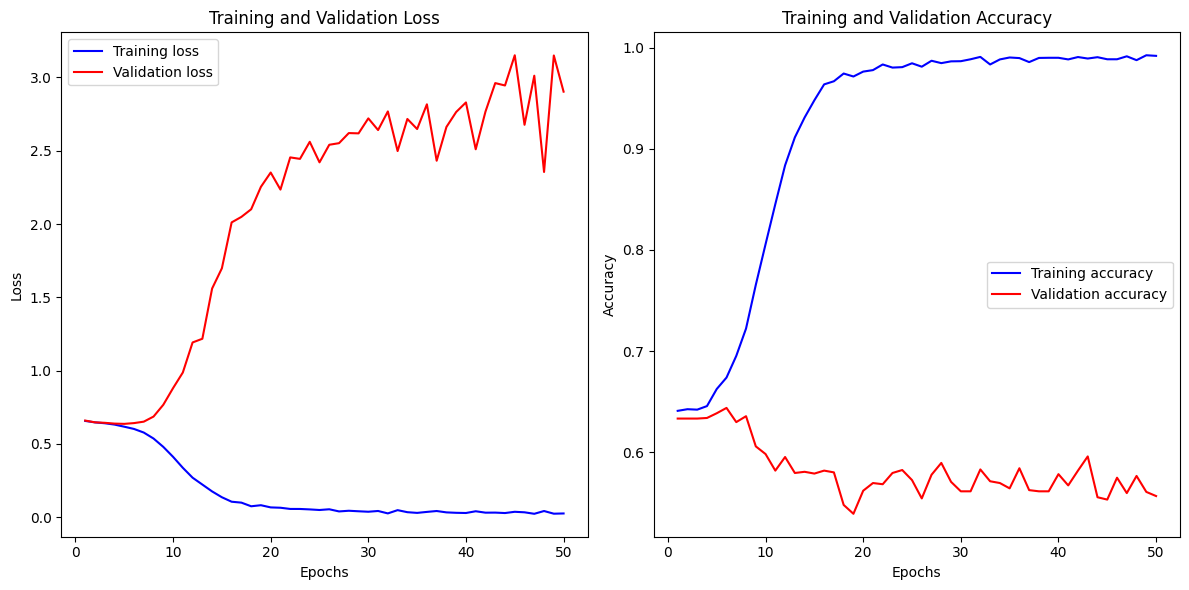

In [10]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Save the model
model.save('model.h5')


In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import pandas as pd

In [13]:
# Load the saved model
model = tf.keras.models.load_model('model.h5')


In [14]:
# Load your test data from test.jsonl
test_df = pd.read_json('test_seen.jsonl', lines=True)

In [15]:
# Preprocess the test data
def preprocess_test_data(df):
    image_data = []
    image_paths = []
    for index, row in df.iterrows():
        img = load_img(row['img'], target_size=(64, 64))
        img = img_to_array(img) / 255.0  # Normalize the pixel values
        image_data.append(img)
        image_paths.append(row['img'])
    return np.array(image_data), image_paths

In [16]:
# Preprocess the test data
X_test, image_paths = preprocess_test_data(test_df)

In [17]:
# Make predictions on the test data
predictions = model.predict(X_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step 


In [18]:
print(predictions)

[[8.27106182e-03]
 [5.24092354e-02]
 [2.79597280e-05]
 [9.84537363e-01]
 [1.62791664e-04]
 [1.43510306e-07]
 [5.98484166e-06]
 [5.38077671e-04]
 [7.31232047e-01]
 [3.69441914e-05]
 [9.99351799e-01]
 [9.81184483e-01]
 [1.74082726e-13]
 [4.81246412e-01]
 [1.95843671e-02]
 [3.46672732e-06]
 [2.45575592e-07]
 [9.98248812e-04]
 [5.70237390e-12]
 [7.23129779e-06]
 [1.57330469e-05]
 [9.97453749e-01]
 [1.01489043e-02]
 [9.19230282e-01]
 [2.28061527e-01]
 [3.70967090e-02]
 [1.85918853e-01]
 [7.89715195e-05]
 [4.10784921e-03]
 [2.25905028e-09]
 [4.82644484e-26]
 [6.76015556e-01]
 [8.23113739e-01]
 [1.00000000e+00]
 [4.72851247e-01]
 [2.04203115e-03]
 [8.49718630e-01]
 [2.96245329e-02]
 [9.91158366e-01]
 [2.44920000e-01]
 [7.14299023e-01]
 [3.26191112e-02]
 [1.62105041e-03]
 [7.99012557e-03]
 [1.06605597e-01]
 [9.99925375e-01]
 [1.36051463e-08]
 [9.99723852e-01]
 [9.83353257e-01]
 [8.56652439e-01]
 [9.71111596e-01]
 [2.87491003e-10]
 [8.38688550e-07]
 [9.93211865e-01]
 [1.15394620e-02]
 [9.357081

In [19]:
# Decode predictions
predicted_labels = ['Hateful' if pred > 0.5 else 'Non-Hateful' for pred in predictions]


In [20]:
# Print predictions


output_file = "meme_predictions.txt"


# Print predictions to the external file
with open(output_file, "w") as f:
    for i in range(len(image_paths)):
        f.write(f"Image: {image_paths[i]}, Predicted Label: {predicted_labels[i]}\n")

print(f"Predictions saved to {output_file}")


Predictions saved to meme_predictions.txt


In [21]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [22]:
# Load the test dataset from test.jsonl
test_df = pd.read_json('test_seen.jsonl', lines=True)

In [23]:
# Preprocess the test data
def preprocess_test_data_accuracy(df):
    image_data = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['img'], target_size=(64, 64))
        img = img_to_array(img) / 255.0  # Normalize the pixel values
        image_data.append(img)
        label = row['label']  # Assuming the label is already in binary format (0 or 1)
        labels.append(label)
    return np.array(image_data), np.array(labels)

In [24]:
# Preprocess the test data
X_test, y_test = preprocess_test_data_accuracy(test_df)

In [25]:
# Evaluate the loaded model on the test data
evaluation = model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5027 - loss: 3.6533


In [27]:
# Print the performance metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Test Loss: 3.338806629180908
Test Accuracy: 0.5205078125
